In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
%store -r train
%store -r test

In [3]:
print(train.shape)
print(test.shape)

(1453, 213)
(1459, 211)


In [4]:
y = train.log_SalePrice
X = train.drop(['SalePrice', 'Id', 'log_SalePrice'], axis=1)
test = test.drop('Id', axis=1)
print(test.shape)
print(X.shape)
print(y.shape)

(1459, 210)
(1453, 210)
(1453,)


## Train_Test_Split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,
                                                    random_state=42)

In [6]:
ols = LinearRegression()
model = ols.fit(X_train, y_train)
print("R^2 for train set: %f" %ols.score(X_train, y_train))
print('-'*50)
print("R^2 for test  set: %f" %ols.score(X_test, y_test))

R^2 for train set: 0.951762
--------------------------------------------------
R^2 for test  set: 0.903774


In [7]:
predictions = ols.predict(X_test)
from sklearn.metrics import mean_squared_error
print ('RMSE is: \n', mean_squared_error(y_test, predictions))

RMSE is: 
 0.014839363673350484


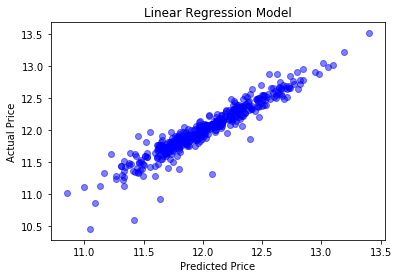

In [12]:
plt.scatter(predictions, y_test, alpha=.5,
            color='b') 
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('T_T_S Linear Model')
plt.show()

## Ridge w/ alpha selection

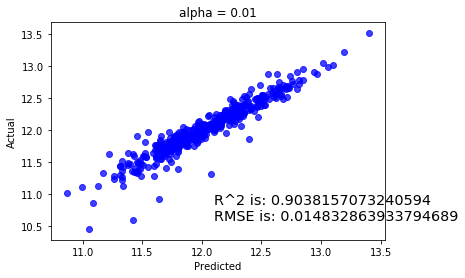

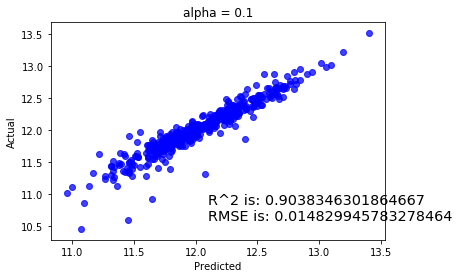

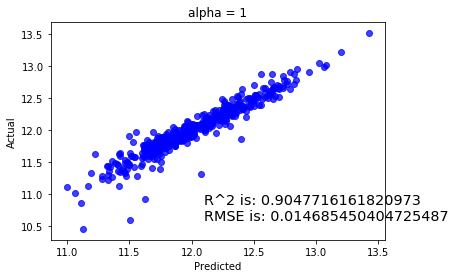

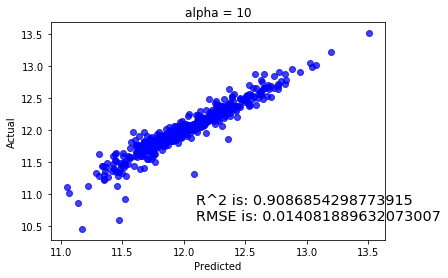

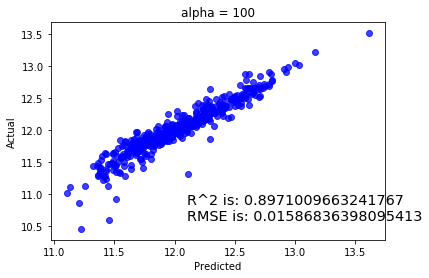

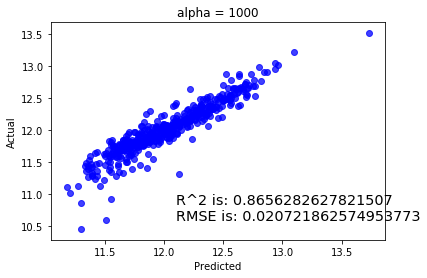

In [13]:
for i in range (-2, 4):
    alpha = 10**i
    rm = linear_model.Ridge(alpha=alpha)
    ridge_model = rm.fit(X_train, y_train)
    preds_ridge = ridge_model.predict(X_test)

    plt.scatter(preds_ridge, actual_values, alpha=.75, color='b')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('alpha = {}'.format(alpha))
    overlay = 'R^2 is: {}\nRMSE is: {}'.format(
                    ridge_model.score(X_test, y_test),
                    mean_squared_error(y_test, preds_ridge))
    plt.annotate(s=overlay,xy=(12.1,10.6),size='x-large')
    plt.show()

## RIDGE MODEL WITH ALPHA = 10

In [26]:
ridge_reg = linear_model.Ridge(alpha=10)

In [27]:
ridge_model = ridge_reg.fit(X_train, y_train)
ridge_predict = ridge_model.predict(X_test)

In [28]:
print("R^2 for train set: %f" %ridge_reg.score(X_train, y_train))
print('-'*50)
print("R^2 for test  set: %f" %ridge_reg.score(X_test, y_test))
print('-'*50)
y_predict = ridge_reg.predict(X_test)
print ('RMSE is: \n', mean_squared_error(y_test, y_predict))

R^2 for train set: 0.944072
--------------------------------------------------
R^2 for test  set: 0.908685
--------------------------------------------------
RMSE is: 
 0.014081889632073007


## LASSO

In [25]:
from sklearn.linear_model import Lasso

alpha = 0.1
lasso = Lasso(alpha=alpha)

y_pred_lasso = lasso.fit(X_train, y_train).predict(X_test)
r2_score_lasso = r2_score(y_test, y_pred_lasso)
print(lasso)
print("r^2 on test data : %f" % r2_score_lasso)

NameError: name 'r2_score' is not defined

## ELASTIC NET

## 10Fold CROSS VALIDATION w/ Ridge

In [21]:
from sklearn.model_selection import KFold
kf=KFold(n_splits=10)
kf.get_n_splits(X)
print(kf)

KFold(n_splits=10, random_state=None, shuffle=False)


In [23]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

In [29]:
scores = cross_val_score(ridge_model, X, y, cv=10)
print('Cross-validated scores:',scores)

Cross-validated scores: [0.89998118 0.93574237 0.94603939 0.91838642 0.90713779 0.91526933
 0.91082569 0.9279802  0.93636821 0.90800381]


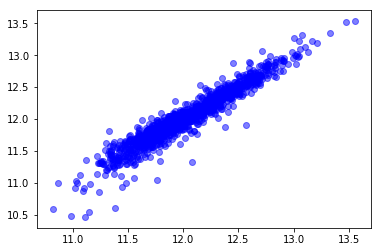

In [32]:
predictions = cross_val_predict(ridge_model, X, y, cv=10)
plt.scatter(predictions,y,alpha=.5, color='b')

In [36]:
cross_R2 = metrics.r2_score(y,predictions)
RMSE = mean_squared_error(y, predictions)
print(cross_R2)
print(RMSE)

0.9209294549180499
0.012586842284581398


## MODEL FOR SUBMISSION